# Network simulator

This notebooks contains an example of a network model simulator


In [2]:

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import numpy as np



from rf_network_simulator.network_simulator import NetworkSimulator,RenderingOptions
from rf_network_simulator.rf_network import NodesDistributionParams


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing: 100%|██████████| 120/120 [00:51<00:00,  2.35it/s, accuracy=0.69] 


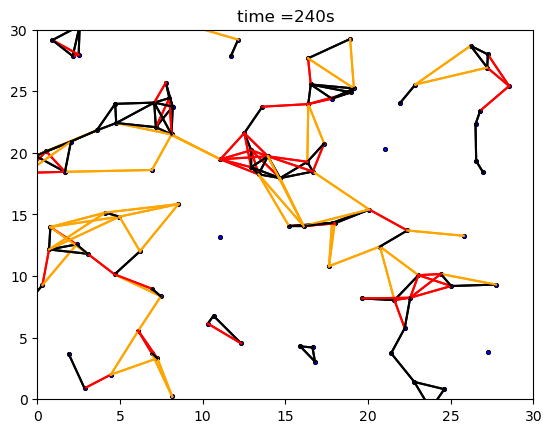

In [5]:





np.random.seed(1)



total_time = 120

update_rate = 15*60 # nodes update every 15 minutes

dist = NodesDistributionParams(area_size_x=5,area_size_y=5,nodes_minimal_distance=0.002,nodes_count=40,velocity_range=(0,12/3.6))

sim = NetworkSimulator(simulation_rate=2,update_rate=update_rate,frequency=150)

res=sim.full_simulation(steps_count=total_time,output_video_opts=RenderingOptions(file_name="output3.mp4"))

